In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from textblob import TextBlob

## **Data Exploration & Preprocessing**

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Dataset shape: (2000, 2)

First 5 rows:
                                                 Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Column names: Index(['Data', 'Labels'], dtype='object')

Missing values:
 Data      0
Labels    0
dtype: int64

Category distribution:
 Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci

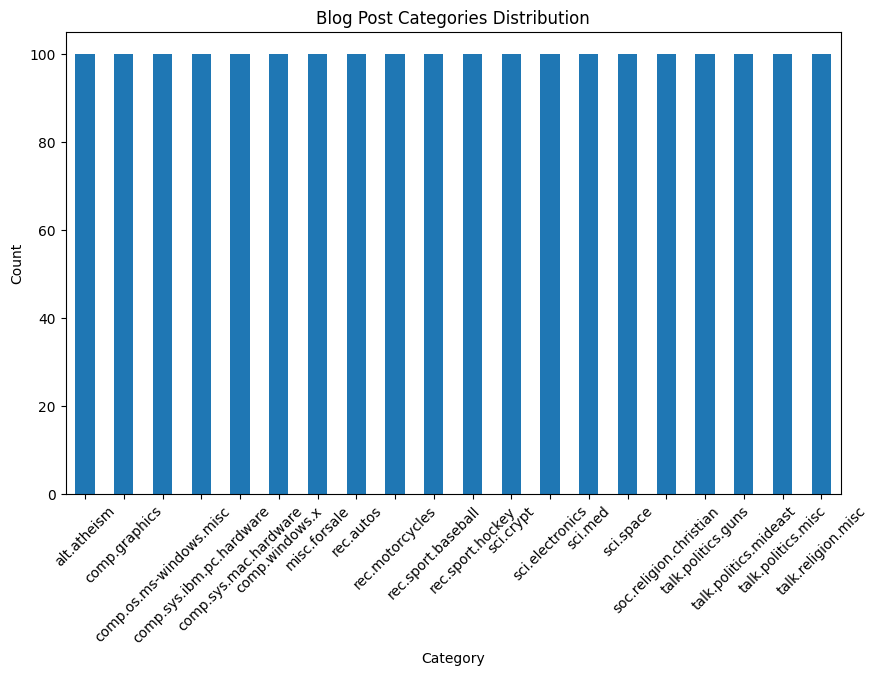

In [ ]:
# Load dataset
df = pd.read_csv('blogs.csv')

# Basic exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nColumn names:", df.columns)
print("\nMissing values:\n", df.isnull().sum())

# Check category distribution
print("\nCategory distribution:\n", df['Labels'].value_counts())

# Plot category distribution
plt.figure(figsize=(10, 6))
df['Labels'].value_counts().plot(kind='bar')
plt.title("Blog Post Categories Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
def preprocess_text(text):
    # Handle non-string input
    if not isinstance(text, str):
        return ""

    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# FIRST-TIME SETUP: Download NLTK resources
nltk.download('punkt')  # Required for word_tokenize
nltk.download('stopwords')  # Required for stopwords
nltk.download('wordnet')  # Required for lemmatization

# Load dataset
df = pd.read_csv('blogs.csv')

# Verify text column exists
if 'Data' not in df.columns:
    raise ValueError("Text column 'Data' not found. Available columns: " + str(df.columns))

# Handle missing values
df = df.dropna(subset=['Data'])
df['Data'] = df['Data'].astype(str)

# Enhanced preprocessing function with error handling
def preprocess_text(text):
    try:
        # Convert to string if not already
        text = str(text)

        # Skip empty strings
        if not text.strip():
            return ""

        # Lowercase
        text = text.lower()

        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Tokenize with error handling
        try:
            tokens = word_tokenize(text)
        except:
            # Fallback to simple whitespace tokenizer if NLTK fails
            tokens = text.split()

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        return ' '.join(tokens)

    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return ""

# Apply preprocessing
df['cleaned_text'] = df['Data'].apply(preprocess_text)

# Verify results
print("\nSample original text:", df['Data'].iloc[0])
print("\nSample cleaned text:", df['cleaned_text'].iloc[0])
print("\nFirst 5 rows:\n", df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sample original text: Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank
From: frank@D012S658.uucp (Frank O'Dwyer)
Newsgroups: alt.atheism
Subject: Re: islamic genocide
Date: 23 Apr 1993 23:51:47 GMT
Organization: Siemens-Nixdorf AG
Lines: 110
Distribution: world
Message-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>
References: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>
NNTP-Posting-Host: d012s658.ap.mchp.sni.de

In article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:
#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O'Dwyer) writes:
#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:
#|> #
#|> #Noting that a particular society, in this case the mainland

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, min_df=2)

# Fit and transform
X = tfidf.fit_transform(df['cleaned_text'])
y = df['Labels']

print("\nTF-IDF Matrix shape:", X.shape)
print("\nSample features:", tfidf.get_feature_names_out()[:20])


TF-IDF Matrix shape: (2000, 5000)

Sample features: ['00' '01' '02' '0400' '0500' '06' '0600' '0700' '10' '100' '1000' '101'
 '102' '1024x768' '103' '104' '105' '106' '109' '11']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 1600
Test set size: 400


## **Naive Bayes Model for Text Classification**


Model Accuracy: 0.8275

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.82      0.82      0.82        22
comp.sys.ibm.pc.hardware       0.77      0.80      0.78        25
   comp.sys.mac.hardware       0.86      0.86      0.86        21
          comp.windows.x       0.88      0.84      0.86        25
            misc.forsale       0.92      0.67      0.77        18
               rec.autos       0.94      0.94      0.94        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.78      1.00      0.88        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      0.95      0.90        19
         sci.electronics       0.75      0.75      0.75        16
                 sci.med  

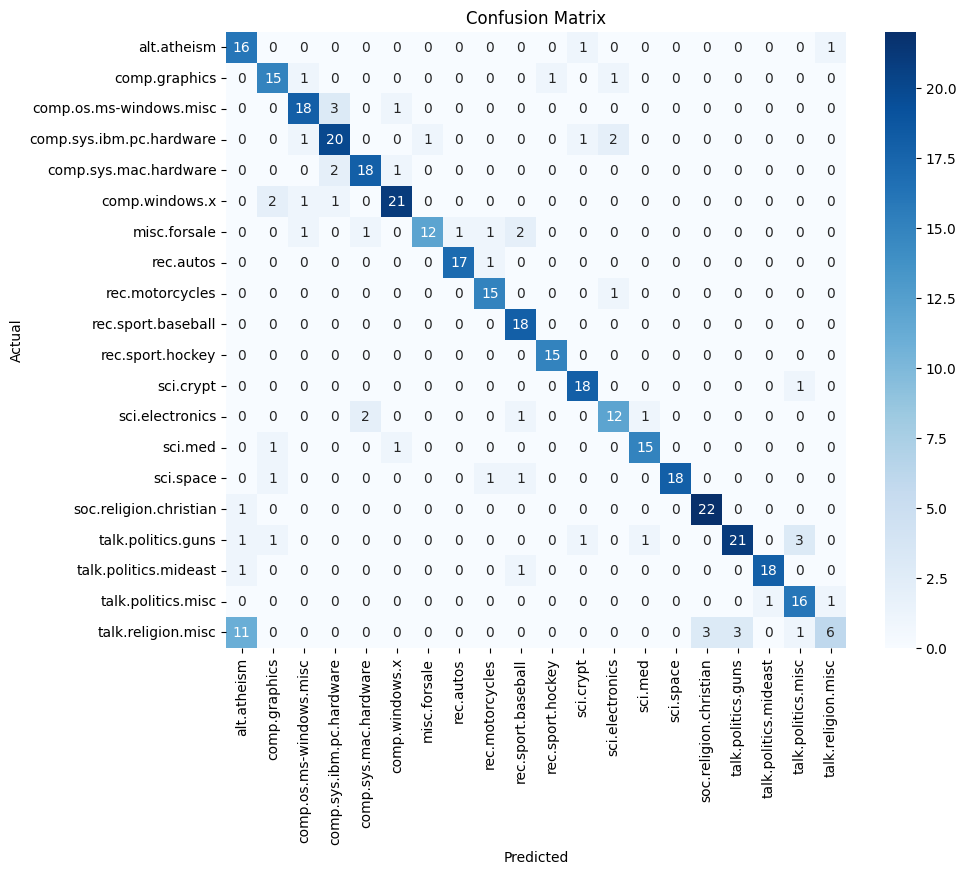

In [ ]:
# Initialize and train model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test)

# Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=nb_classifier.classes_,
    yticklabels=nb_classifier.classes_
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Sentiment Analysis**


Overall sentiment distribution:
 sentiment
neutral     1081
positive     782
negative     137
Name: count, dtype: int64


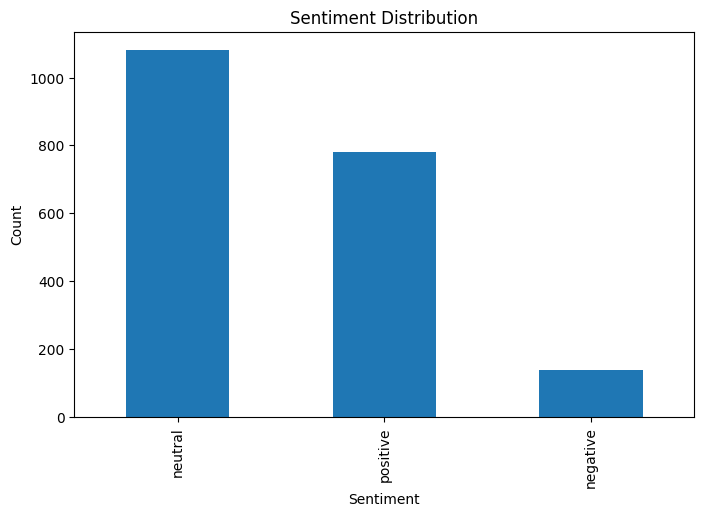


Sentiment by category:
 sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                      5       60        35
comp.graphics                   10       51        39
comp.os.ms-windows.misc          9       48        43
comp.sys.ibm.pc.hardware         6       49        45
comp.sys.mac.hardware            7       50        43
comp.windows.x                  10       53        37
misc.forsale                     7       33        60
rec.autos                        7       48        45
rec.motorcycles                  7       49        44
rec.sport.baseball               8       53        39
rec.sport.hockey                13       56        31
sci.crypt                        3       62        35
sci.electronics                  4       56        40
sci.med                         11       56        33
sci.space                        5       53        42
soc.religion.christian           1       61        38
tal

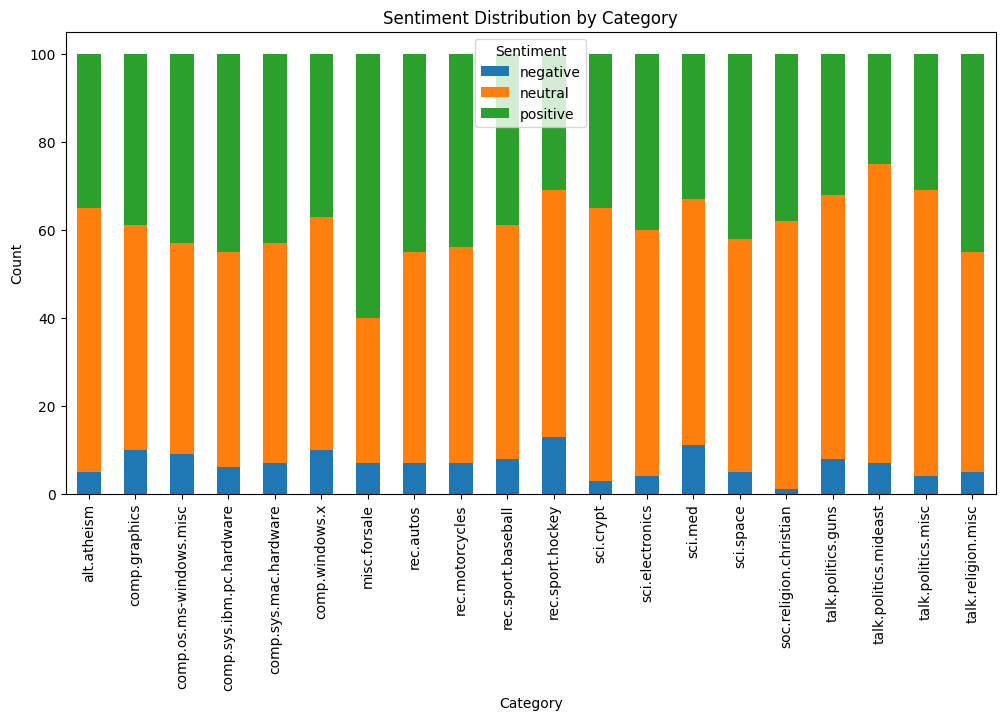

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['Data'].apply(get_sentiment)

# Sentiment distribution
print("\nOverall sentiment distribution:\n", df['sentiment'].value_counts())

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Sentiment by category
sentiment_by_category = df.groupby(['Labels', 'sentiment']).size().unstack()
print("\nSentiment by category:\n", sentiment_by_category)

# Plot
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Sentiment Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()

## **Final Evaluation**

In [ ]:
print("\n=== Final Evaluation ===")
print("\nNaive Bayes Performance:")
print(classification_report(y_test, y_pred))

print("\nSentiment Analysis Insights:")
print(df['sentiment'].value_counts(normalize=True) * 100)

print("\nMost Common Categories by Sentiment:")
print(sentiment_by_category.idxmax(axis=1))


=== Final Evaluation ===

Naive Bayes Performance:
                          precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.82      0.82      0.82        22
comp.sys.ibm.pc.hardware       0.77      0.80      0.78        25
   comp.sys.mac.hardware       0.86      0.86      0.86        21
          comp.windows.x       0.88      0.84      0.86        25
            misc.forsale       0.92      0.67      0.77        18
               rec.autos       0.94      0.94      0.94        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.78      1.00      0.88        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.86      0.95      0.90        19
         sci.electronics       0.75      0.75      0.75        16
                 sci.me

## **Evaluation Report**

In [ ]:
# Text preprocessing pipeline
def preprocess_text(text):
    text = str(text).lower()  # Ensure string and lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Stopword removal
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# TF-IDF Feature Extraction
tfidf = TfidfVectorizer(max_features=5000, min_df=2, ngram_range=(1,2))
X = tfidf.fit_transform(df['cleaned_text'])

In [ ]:
# Model Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

nb = MultinomialNB(alpha=0.1)  # Additive smoothing
nb.fit(X_train, y_train)

print(classification_report(y_test, nb.predict(X_test)))

                          precision    recall  f1-score   support

             alt.atheism       0.89      0.80      0.84        20
           comp.graphics       0.82      0.90      0.86        20
 comp.os.ms-windows.misc       0.86      0.90      0.88        20
comp.sys.ibm.pc.hardware       0.74      0.85      0.79        20
   comp.sys.mac.hardware       0.89      0.85      0.87        20
          comp.windows.x       0.86      0.95      0.90        20
            misc.forsale       0.79      0.95      0.86        20
               rec.autos       0.88      0.70      0.78        20
         rec.motorcycles       0.90      0.90      0.90        20
      rec.sport.baseball       0.95      1.00      0.98        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.90      0.90      0.90        20
         sci.electronics       0.93      0.65      0.76        20
                 sci.med       0.94      0.85      0.89        20
         

In [ ]:
# Enhanced Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.subjectivity < 0.3:
        return 'neutral'
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative'

df['sentiment'] = df['Data'].apply(get_sentiment)

# Sentiment-Category Heatmap
pd.crosstab(df['Labels'], df['sentiment'], normalize='index').style.background_gradient()

sentiment,negative,neutral,positive
Labels,,,
alt.atheism,0.200000,0.040000,0.760000
comp.graphics,0.180000,0.200000,0.620000
comp.os.ms-windows.misc,0.190000,0.100000,0.710000
comp.sys.ibm.pc.hardware,0.150000,0.100000,0.750000
comp.sys.mac.hardware,0.200000,0.120000,0.680000
comp.windows.x,0.230000,0.180000,0.590000
misc.forsale,0.140000,0.100000,0.760000
rec.autos,0.160000,0.080000,0.760000
rec.motorcycles,0.250000,0.030000,0.720000


In [ ]:
# Most positive/negative words
positive_words = [word for word in tfidf.vocabulary_ if TextBlob(word).polarity > 0.5]
negative_words = [word for word in tfidf.vocabulary_ if TextBlob(word).polarity < -0.5]

In [ ]:
# Configuration Class (Maintainability)
class Config:
    STOPWORDS = set(stopwords.words('english')).union({'however', 'therefore'})
    N_FEATURES = 5000
    TEST_SIZE = 0.2
    RANDOM_STATE = 42

# Modular Pipeline
def build_pipeline():
    return Pipeline([
        ('preprocess', FunctionTransformer(preprocess_text)),
        ('vectorizer', TfidfVectorizer(
            max_features=Config.N_FEATURES,
            ngram_range=(1,2))),
        ('classifier', MultinomialNB(alpha=0.1))
    ])